In [1]:
# Step 1: Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pylab as pl
import math
import re
%matplotlib inline

### Metropolitan GDP per capita *(in USD, constant prices, constant PPP, base year 2010)* in Mexico.
Information was sourced from OCED.stats at the following url: (https://stats.oecd.org/Index.aspx?DatasetCode=SNA_TABLE1#). The table was downloaded as a .csv file and has been uploaded into this Jupyter Notebook.

In [5]:
# Step 2: Load and test dataset and set the index if applicable
mexico_gdp = pd.read_csv('mexico_region_gdp_per_capita.csv')
mexico_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
Metropolitan Areas    64 non-null object
Year_2010             64 non-null object
Year_2015             64 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


### Step 1: Explore the Data and Create Clean Sub-Dataframe for Analysis

In [6]:
mexico_gdp.head(31)

,Metropolitan Areas,Year_2010,Year_2015
0,MEX51: Minatitlan,12108,12105
1,MEX58: Campeche,..,..
2,MEX46: Victoria,17832,17581
3,MEX30: Durango,13269,13849
4,MEX04: Puebla,10304,10681
5,MEX38: Tepic,11481,11647
6,MEX42: Nuevo Laredo,18320,17581
7,MEX39: Orizaba,12337,12105
8,MEX53: Chilpancingo de los Bravo,8320,8062
9,MEX35: Matamoros,17302,17580


In [7]:
mexico_gdp.tail(31)

,Metropolitan Areas,Year_2010,Year_2015
33,MEX07: Leon,12476,14428
34,MEX48: Cordoba,12131,12105
35,MEX49: Uruapan,10191,10430
36,MEX10: Juarez,15330,18101
37,MEX08: Queretaro,19732,21741
38,MEX25: Reynosa,19755,17549
39,MEX09: Merida,12688,13672
40,MEX36: Ensenada,17723,19041
41,MEX13: Mexicali,17468,19048
42,MEX45: Tapachula,7169,6696


*Preliminary Observations*: When seeing that the GDP data for Campeche and Mexico was missing, I assumed that the GDP values did not transfer over from OCED.stat. However, upon further review of the source file, there is no Campeche or Mexico GDP information available in the OCED.stat dataset. Since GDP is to be used as a potential predictive factor for maternal mortality, the assessment of Campeche, individually, will be weakend without this data. However, a rough approximation of Mexico's total GDP based off of the listed GDPs can be used to assess the country of Mexico as a whole.

Although there are values missing, the overall purpose of this dataset is to merge it with other factors potentially involved in maternal mortality. Therefore, despite these rows having missing values, they will remain in the dataset.

In [7]:
# Create a Dataframe to store data types in mexico_gdp
mex_gdp_dtypes = pd.DataFrame(mexico_gdp.dtypes)

#Rename column name to DataType
mex_gdp_dtypes = mex_gdp_dtypes.rename(columns={0:'DataType'})

#Analyze Missing Values
mex_gdp_dtypes['MissingVal'] = mexico_gdp.isnull().sum()

#Identify number of unique values
mex_gdp_dtypes['NumUnique'] = mexico_gdp.nunique()

#Identify the count for each variable
mex_gdp_dtypes['Count']= mexico_gdp.count()
mex_gdp_dtypes

,DataType,MissingVal,NumUnique,Count
Metropolitan Areas,object,0,64,64
Year_2010,object,0,63,64
Year_2015,object,0,43,64


**Conclusion**: The dataset seems rather clean as there are no missing values. Now, the list of 'Metropolitan areas' needs to be catagorized into the 32 Provinces within Mexico.

In [8]:
list(np.unique(mexico_gdp['Metropolitan Areas']))

['MEX01: Mexico City',
 'MEX02: Guadalajara',
 'MEX03: Monterrey',
 'MEX04: Puebla',
 'MEX05: Toluca',
 'MEX06: Tijuana',
 'MEX07: Leon',
 'MEX08: Queretaro',
 'MEX09: Merida',
 'MEX10: Juarez',
 'MEX11: San Luis Potosi',
 'MEX12: Torreon',
 'MEX13: Mexicali',
 'MEX14: Cuernavaca',
 'MEX15: Centro',
 'MEX16: Culiacan',
 'MEX17: Morelia',
 'MEX18: Chihuahua',
 'MEX19: Veracruz',
 'MEX20: Hermosillo',
 'MEX21: Aguascalientes',
 'MEX22: Acapulco de Juarez',
 'MEX23: Tampico',
 'MEX24: Oaxaca de Juarez',
 'MEX25: Reynosa',
 'MEX26: Xalapa',
 'MEX27: Saltillo',
 'MEX28: Benito Juarez',
 'MEX29: Celaya',
 'MEX30: Durango',
 'MEX31: Tuxtla Gutierrez',
 'MEX32: Pachuca de Soto',
 'MEX33: Irapuato',
 'MEX34: Ahome',
 'MEX35: Matamoros',
 'MEX36: Ensenada',
 'MEX37: Poza Rica de Hidalgo',
 'MEX38: Tepic',
 'MEX39: Orizaba',
 'MEX40: Mazatlan',
 'MEX41: Cajeme',
 'MEX42: Nuevo Laredo',
 'MEX43: Guadalupe',
 'MEX44: Coatzacoalcos',
 'MEX45: Tapachula',
 'MEX46: Victoria',
 'MEX47: Tlaxcala',
 'MEX

In [9]:
# Convert number objects in Year_2010 and Year_2015 to numbers

# Year_2010
mexico_gdp['Year_2010'] = pd.to_numeric(mexico_gdp['Year_2010'], errors='coerce')

# Year_2015
mexico_gdp['Year_2015'] = pd.to_numeric(mexico_gdp['Year_2015'], errors='coerce')

# Verify object datatypes were switched to numbers
mexico_gdp.dtypes

Metropolitan Areas     object
Year_2010             float64
Year_2015             float64
dtype: object

In [10]:
# Step 4: Run descriptive statistics of number datatypes
mexico_gdp.describe(include=['number'])

,Year_2010,Year_2015
count,62.000000,62.000000
mean,15115.596774,15444.177419
std,5268.897192,4965.949402
min,7102.000000,6696.000000
25%,12094.500000,11947.000000
50%,13550.500000,14661.000000
75%,17804.750000,19045.500000
max,31370.000000,28251.000000


In [9]:
# Reindex by Metropolitan Area
mexico_gdp = mexico_gdp.sort_values(by=['Metropolitan Areas'],ascending=True)

# Reset the Index
mexico_gdp = mexico_gdp.reset_index()
mexico_gdp.head()

,index,Metropolitan Areas,Year_2010,Year_2015
0,16,MEX01: Mexico City,21553,22587
1,31,MEX02: Guadalajara,16572,17636
2,22,MEX03: Monterrey,31365,28251
3,4,MEX04: Puebla,10304,10681
4,21,MEX05: Toluca,10423,10633


In [10]:
# Remove New Index Column
mexico_gdp = mexico_gdp.drop(['index'], axis=1)
mexico_gdp.head()

,Metropolitan Areas,Year_2010,Year_2015
0,MEX01: Mexico City,21553,22587
1,MEX02: Guadalajara,16572,17636
2,MEX03: Monterrey,31365,28251
3,MEX04: Puebla,10304,10681
4,MEX05: Toluca,10423,10633


In [11]:
# Create an empty list to store new Metropolitan Areas string
metro_areas = []

# Iterate through Metropolitan Areas to Remove the MEX## from the string and add to metro_areas
for metro in mexico_gdp['Metropolitan Areas']:
    """Remove MEX##: from Metropolitan Area Strings."""
    
    # Remove all numbers from each Metro Area string
    metro_no_numbers = re.sub("\d+", " ", metro)
    
    # Remove all 'MEX : ' from each Metro Area string
    metro_new_string = metro_no_numbers.replace('MEX : ', '')
    metro_new_string = metro_new_string.replace('MEX: ', '')
    
    # Create new Metro Area Column in mexico_gdp with metro_str_modified
    metro_areas.append(metro_new_string)

In [12]:
# Convert the list to a Series and add as new column to res_dataset
mexico_gdp['Metro Areas'] = pd.Series(metro_areas)
mexico_gdp['Metro Areas'].head()

0    Mexico City
1    Guadalajara
2      Monterrey
3         Puebla
4         Toluca
Name: Metro Areas, dtype: object

In [13]:
mexico_gdp.head()

,Metropolitan Areas,Year_2010,Year_2015,Metro Areas
0,MEX01: Mexico City,21553,22587,Mexico City
1,MEX02: Guadalajara,16572,17636,Guadalajara
2,MEX03: Monterrey,31365,28251,Monterrey
3,MEX04: Puebla,10304,10681,Puebla
4,MEX05: Toluca,10423,10633,Toluca


In [14]:
mexico_gdp = mexico_gdp.drop(columns='Metropolitan Areas')
mexico_gdp.head()

,Year_2010,Year_2015,Metro Areas
0,21553,22587,Mexico City
1,16572,17636,Guadalajara
2,31365,28251,Monterrey
3,10304,10681,Puebla
4,10423,10633,Toluca


In [15]:
# Store new mexico_gdp as a global variable that can be uploaded to other Jupyter Notebooks
%store mexico_gdp

Stored 'mexico_gdp' (DataFrame)


In [16]:
# Reindex by Metropolitan Area
mexico_gdp = mexico_gdp.sort_values(by=['Metro Areas'],ascending=True)

# Reset the Index
mexico_gdp = mexico_gdp.reset_index()
mexico_gdp.head()

,index,Year_2010,Year_2015,Metro Areas
0,21,7949,8039,Acapulco de Juarez
1,20,16597,19528,Aguascalientes
2,33,13975,14894,Ahome
3,27,18861,19406,Benito Juarez
4,40,20208,22840,Cajeme


In [17]:
# Remove New Index Column
mexico_gdp = mexico_gdp.drop(['index'], axis=1)
mexico_gdp.head()

,Year_2010,Year_2015,Metro Areas
0,7949,8039,Acapulco de Juarez
1,16597,19528,Aguascalientes
2,13975,14894,Ahome
3,18861,19406,Benito Juarez
4,20208,22840,Cajeme


### Data Visualization: Create a Chloropeth Map Using Geopandas, Pandas and Matplotlib

In [20]:
# Create a Region Chloropeth map of Metro Areas in Mexico by GDP in 2010 and 2015
data = [ 
    dict(
     type=’choropleth’,
     locations = data_all[‘Country’],
     autocolorscale = True,
     z = data_all[‘GDP Per Capita’],
     locationmode = ‘country names’,
     marker = dict(
     line = dict (
     color = ‘rgb(255,255,255)’,
     width = 2
     )
   ),
   colorbar = dict(
   title = “Millions USD”)
 ) ]

layout = dict(
 title = ‘Top Countries by GDP per capital’)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig

SyntaxError: invalid character in identifier (<ipython-input-20-551a99c55ab4>, line 4)

In [21]:
# Store mexico_gdp subdataset as a global variable that can be uploaded to other Jupyter Notebooks
%store mexico_gdp

Stored 'mexico_gdp' (DataFrame)


### ANALYZE THE GDP BY REGION - GROUP METRO AREAS BY REGION 

In [22]:
# Group Metro Areas by Region

# Upload metro_by_region dictionary from metro_by_region_initial_examination Jupyter File
%store -r materna_region_df

In [23]:
materna_region_df.head()

,Metro Area1,City1
0,013 HUAMANTLA,Tlaxcala
1,013 HUAMANTLA,Tlaxcala
2,037 HUIXQUILUCAN,México
3,001 ACAMBAY,México
4,056 MORELOS,México


In [24]:
# Create an empty list to store new Metropolitan Areas string
materna_metro_areas = []

# Iterate through Metropolitan Areas to Remove the MEX## from the string and add to metro_areas
for metro in materna_region_df['Metro Area1']:
    """Remove '######### '  from Materna Metro Strings."""
    
    # Remove all numbers from each Metro Area string
    metro_no_numbers = re.sub("\d+", " ", metro)
    
    # Create new Metro Area Column in mexico_gdp with metro_str_modified
    materna_metro_areas.append(metro_no_numbers)

In [25]:
# Make new column in materna_region_df for new Metro Area strings
materna_region_df['Metro Areas'] = pd.Series(materna_metro_areas)

# Make new column in materna_region_df for Region
materna_region_df['City'] = materna_region_df['City1']

# Drop the old Metro Areas column
materna_region_df = materna_region_df.drop(columns=['Metro Area1', 'City1'])

materna_region_df.head()

,Metro Areas,City
0,HUAMANTLA,Tlaxcala
1,HUAMANTLA,Tlaxcala
2,HUIXQUILUCAN,México
3,ACAMBAY,México
4,MORELOS,México


In [26]:
# Remove duplicate rows
materna_region_df = materna_region_df.drop_duplicates()
len(materna_region_df)

1882

In [27]:
# Reindex by Metropolitan Area
materna_region_df = materna_region_df.sort_values(by=['Metro Areas'])

# Reset the Index
materna_region_df = materna_region_df.reset_index()
materna_region_df.head()

,index,Metro Areas,City
0,14766,ABASOLO,Coahuila de Zaragoza
1,1951,ABASOLO,Guanajuato
2,502,ACACOYAGUA,Chiapas
3,583,ACAJETE,Puebla
4,1135,ACAJETE,Veracruz de Ignacio de la Llave


In [28]:
# Remove New Index Column
materna_region_df = materna_region_df.drop(['index'], axis=1)
materna_region_df.head()

,Metro Areas,City
0,ABASOLO,Coahuila de Zaragoza
1,ABASOLO,Guanajuato
2,ACACOYAGUA,Chiapas
3,ACAJETE,Puebla
4,ACAJETE,Veracruz de Ignacio de la Llave


In [29]:
materna_region_df.head(10)

,Metro Areas,City
0,ABASOLO,Coahuila de Zaragoza
1,ABASOLO,Guanajuato
2,ACACOYAGUA,Chiapas
3,ACAJETE,Puebla
4,ACAJETE,Veracruz de Ignacio de la Llave
5,ACALA,Chiapas
6,ACAMBARO,Guanajuato
7,ACAMBAY,México
8,ACANCEH,Yucatán
9,ACAPETAHUA,Chiapas


In [30]:
materna_region_df.tail(10)

,Metro Areas,City
1872,ZITACUARO,Michoacán de Ocampo
1873,ZITLALA,Guerrero
1874,ZITLALTEPEC DE TRINIDAD SANCHEZ SANTOS,Tlaxcala
1875,ZONGOLICA,Veracruz de Ignacio de la Llave
1876,ZONTECOMATLAN DE LOPEZ Y FUENTES,Veracruz de Ignacio de la Llave
1877,ZOQUIAPAN,Puebla
1878,ZOQUITLAN,Puebla
1879,ZOZOCOLCO DE HIDALGO,Veracruz de Ignacio de la Llave
1880,ZUMPAHUACAN,México
1881,ZUMPANGO,México


In [31]:
mexico_gdp.head()

,Year_2010,Year_2015,Metro Areas
0,7949.0,8039.0,Acapulco de Juarez
1,16597.0,19528.0,Aguascalientes
2,13975.0,14894.0,Ahome
3,18861.0,19406.0,Benito Juarez
4,20208.0,22840.0,Cajeme


In [32]:
mexico_region = {}

# Iterate of metro_region_dict
for gdp_metro in mexico_gdp['Metro Areas']:
    #print(gdp_metro)
    
    for materna_metro in materna_region_df['City']:
        #print(materna_metro)
        
        if materna_metro == gdp_metro:
            #print(materna_metro,'+', gdp_metro)
            
            state_df = materna_region_df[materna_region_df['City'] == materna_metro]
            state = state_df['City']
            #print(state)
            mexico_region[gdp_metro] = state

In [33]:
list(mexico_region)

['Aguascalientes',
 'Campeche',
 'Chihuahua',
 'Colima',
 'Durango',
 'Puebla',
 'Tlaxcala']

In [35]:
mexico_gdp['Metro Areas'].dropna()

0            Acapulco de Juarez
1                Aguascalientes
2                         Ahome
3                 Benito Juarez
4                        Cajeme
5                      Campeche
6                        Celaya
7                        Centro
8                     Chihuahua
9     Chilpancingo de los Bravo
10                Coatzacoalcos
11                       Colima
12                      Cordoba
13                      Cuautla
14                   Cuernavaca
15                     Culiacan
16                      Durango
17                     Ensenada
18                  Guadalajara
19                    Guadalupe
20                   Hermosillo
21                     Irapuato
22                       Juarez
23                       La Paz
24                         Leon
25                    Los Cabos
26                    Matamoros
27                     Mazatlan
28                       Merida
29                     Mexicali
                ...            
34      

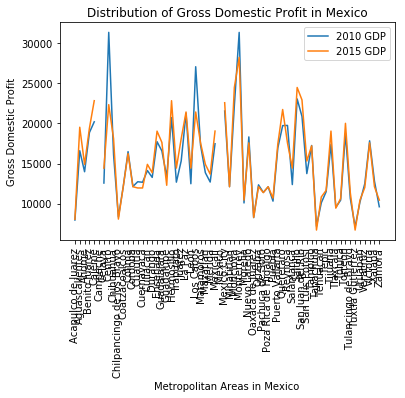

In [36]:
# Visualize the graph

# Add line plot for 2010 GDP values in Mexico Provinces
plt.plot(mexico_gdp['Metro Areas'], mexico_gdp['Year_2010'])
plt.plot(mexico_gdp['Metro Areas'], mexico_gdp['Year_2015'])

# Adjust labesl
plt.xticks(rotation='vertical')
labels = ['2010 GDP', '2015 GDP']

# Label axis 
plt.xlabel('Metropolitan Areas in Mexico')
plt.ylabel('Gross Domestic Profit')
plt.title('Distribution of Gross Domestic Profit in Mexico')
plt.legend(labels)

# Show plot
plt.show()

# GDP v Age of Maternal Death *BY REGION* 
# Use the following code for Linear Regression (Machine Learning):

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()